<a href="https://colab.research.google.com/github/soyoon-0118/2025-1-myclass-BDA/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%8C%80%ED%94%8C%EA%B3%BC%EC%A0%9C_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 서울 강수량 데이터 불러오기 및 데이터 확인

In [14]:
df = pd.read_csv('data/서울강수량.csv', encoding='cp949') # CSV 파일 읽기

df

,년월,지점,강수량(mm)
0,2005-01-01,108,4.5
1,2005-02-01,108,17.2
2,2005-03-01,108,12.5
3,2005-04-01,108,94.7
4,2005-05-01,108,85.8
...,...,...,...
240,2025-01-01,108,19.5
241,2025-02-01,108,5.2
242,2025-03-01,108,38.2
243,2025-04-01,108,94.6


In [15]:
df.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년월       245 non-null    object 
 1   지점       245 non-null    int64  
 2   강수량(mm)  245 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [16]:
df.dtypes # 컬럼명과 데이터타입을 series 형태로 반환

,0
년월,object
지점,int64
강수량(mm),float64


In [17]:
df.describe() # 통계량 요약

,지점,강수량(mm)
count,245.0,245.000000
mean,108.0,114.703673
std,0.0,159.686614
min,108.0,0.000000
25%,108.0,23.800000
50%,108.0,61.600000
75%,108.0,132.000000
max,108.0,1131.000000


In [18]:
df.head(10)

,년월,지점,강수량(mm)
0,2005-01-01,108,4.5
1,2005-02-01,108,17.2
2,2005-03-01,108,12.5
3,2005-04-01,108,94.7
4,2005-05-01,108,85.8
5,2005-06-01,108,168.5
6,2005-07-01,108,269.4
7,2005-08-01,108,285.0
8,2005-09-01,108,313.3
9,2005-10-01,108,52.6


## 연도별 총 강수량 분석 및 시각화

In [20]:
# 매년 총 강수량의 변화 추이를 살펴보고 기후 변화의 패턴을 파악.

date_col = '년월'
rain_col = '강수량(mm)'

df[date_col] = pd.to_datetime(df[date_col], errors='coerce') # 날짜 형식 변환
df[rain_col] = pd.to_numeric(df[rain_col], errors='coerce') # 강수량 숫자형으로 변환 (결측값은 NaN으로 처리)
df = df.dropna(subset=[date_col, rain_col]) # 결측치 제거
df['연도'] = df[date_col].dt.year # 연도 컬럼 생성
annual_rain = df.groupby('연도')[rain_col].sum() # 연도별 총 강수량 계산

print("연도별 총 강수량:\n", annual_rain)

연도별 총 강수량:
 연도
2005    1358.4
2006    1681.9
2007    1212.3
2008    1356.3
2009    1564.0
2010    2043.5
2011    2039.3
2012    1646.3
2013    1403.8
2014     808.9
2015     792.1
2016     991.7
2017    1233.2
2018    1284.1
2019     891.3
2020    1651.1
2021    1186.5
2022    1775.3
2023    1598.8
2024    1311.4
2025     272.2
Name: 강수량(mm), dtype: float64


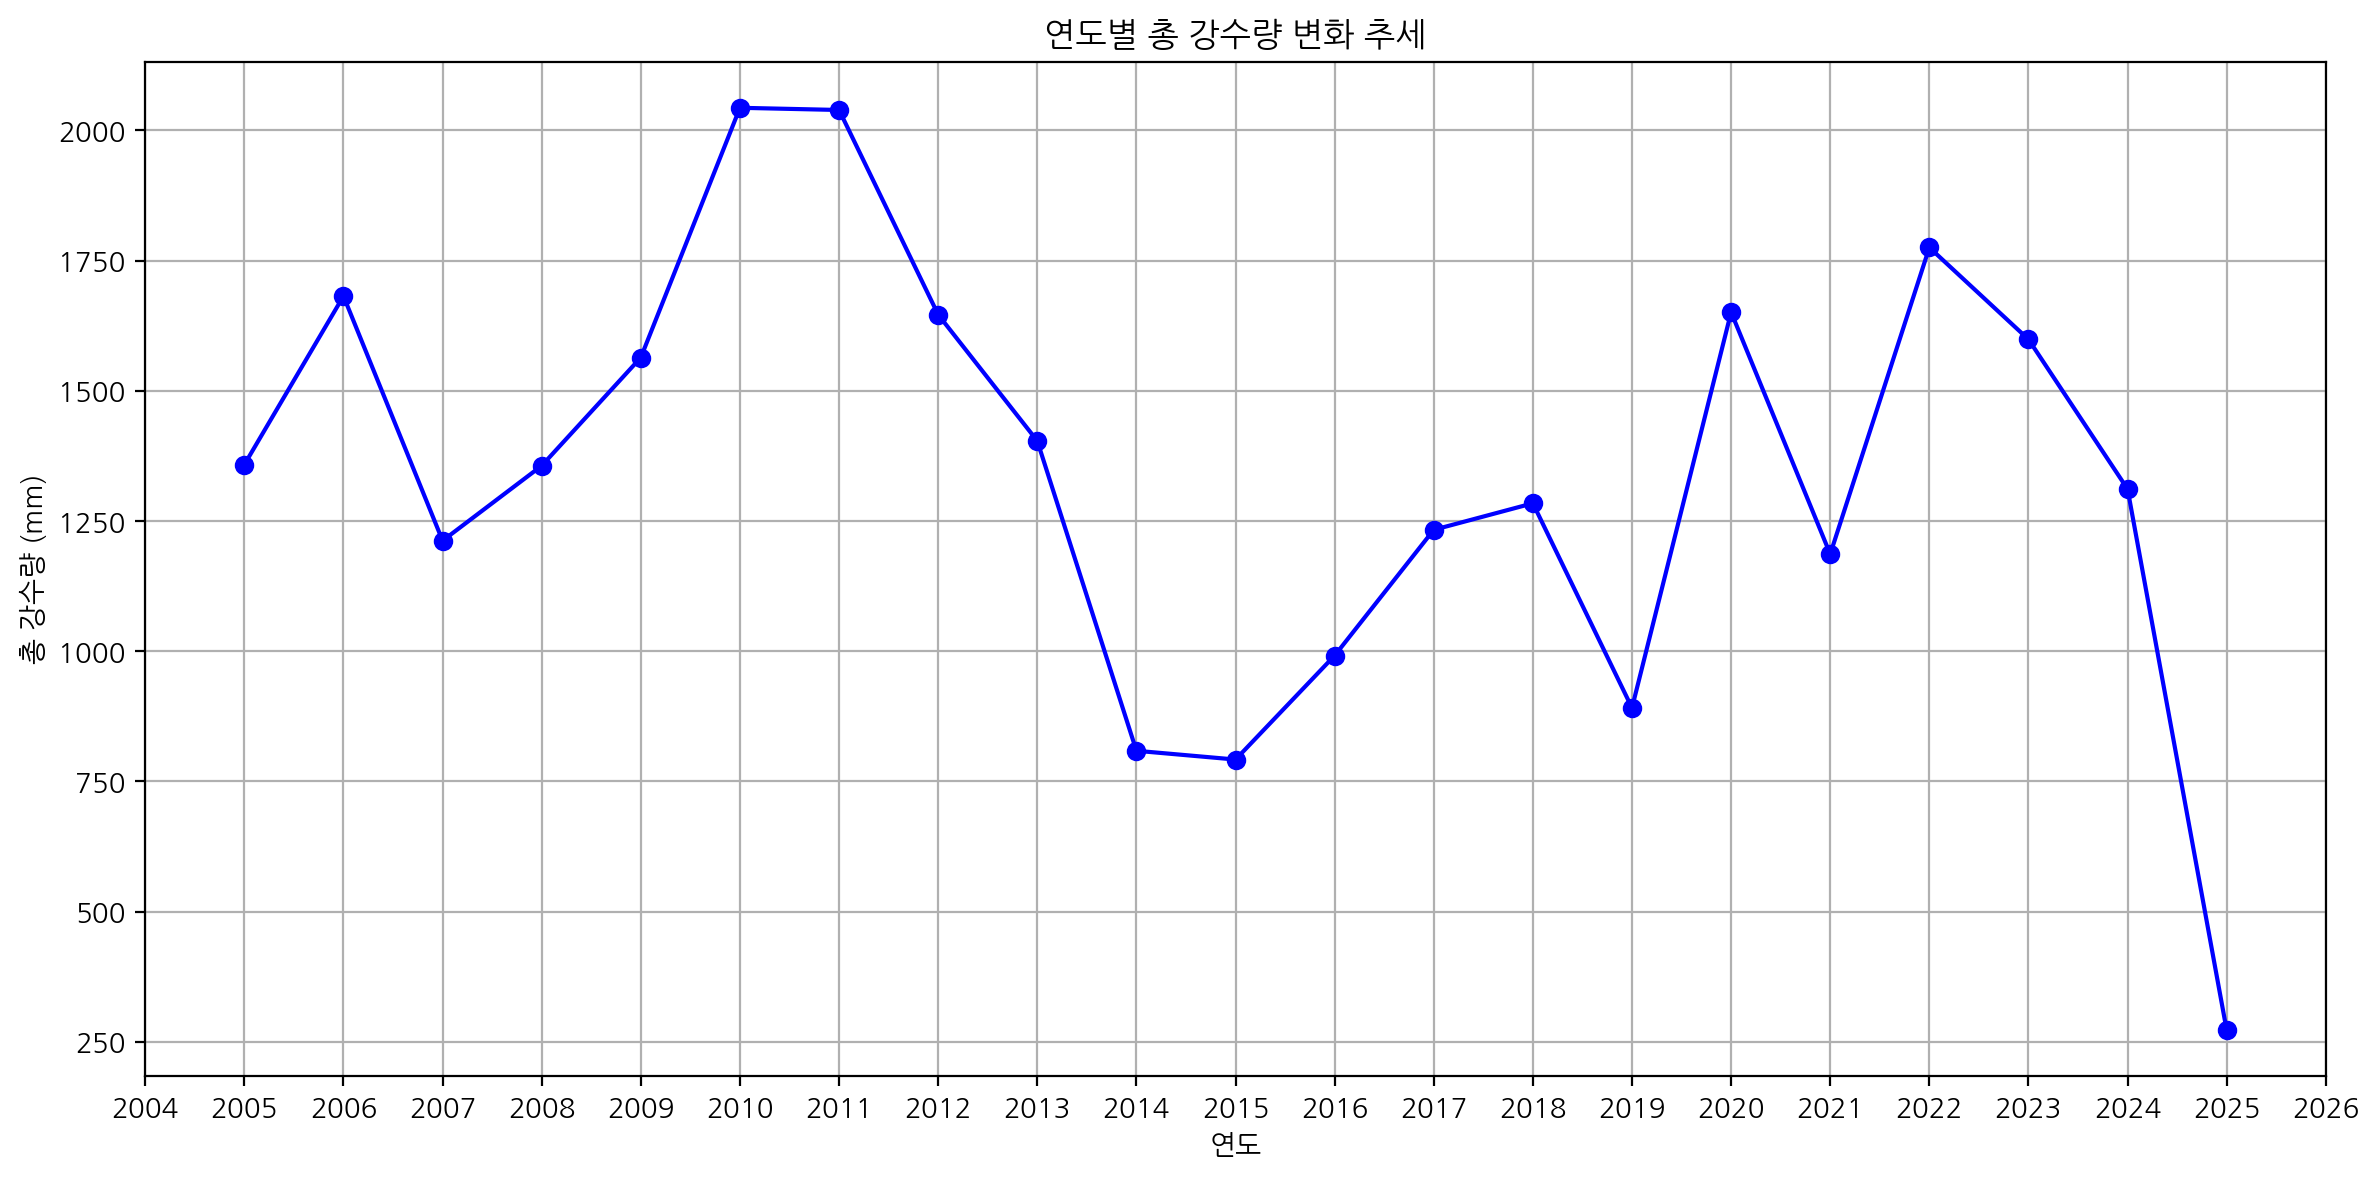

In [24]:
# 시각화


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

plt.rc('font', family='NanumGothic') # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

%config InlineBackend.figure_format = 'retina' # 그림 선명하게

plt.figure(figsize=(12,6))
plt.plot(annual_rain.index, annual_rain.values, marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('연도별 총 강수량 변화 추세')
plt.xlabel('연도')
plt.ylabel('총 강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 계절별 강수량 분포 분석

In [29]:
# 봄, 여름, 가을, 겨울로 나눠 강수량의 평균 및 분포를 분석하여 계절 특성 파악.

df_clean = df.copy()

# 월 컬럼 생성
df['일자'] = pd.to_datetime(df['년월'], errors='coerce')
df['강수량(mm)'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')


df['월'] = df['일자'].dt.month # 날짜 컬럼에서 월 추출

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
df['계절'] = df['월'].apply(get_season)

# 계절별 평균 강수량
seasonal_mean = df.groupby('계절')['강수량(mm)'].mean().reindex(['봄', '여름', '가을', '겨울'])
print("계절별 평균 강수량 (mm):\n", seasonal_mean)

계절별 평균 강수량 (mm):
 계절
봄      71.871429
여름    283.050000
가을     86.691667
겨울     22.419355
Name: 강수량(mm), dtype: float64


<ipython-input-31-9750b397864c>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


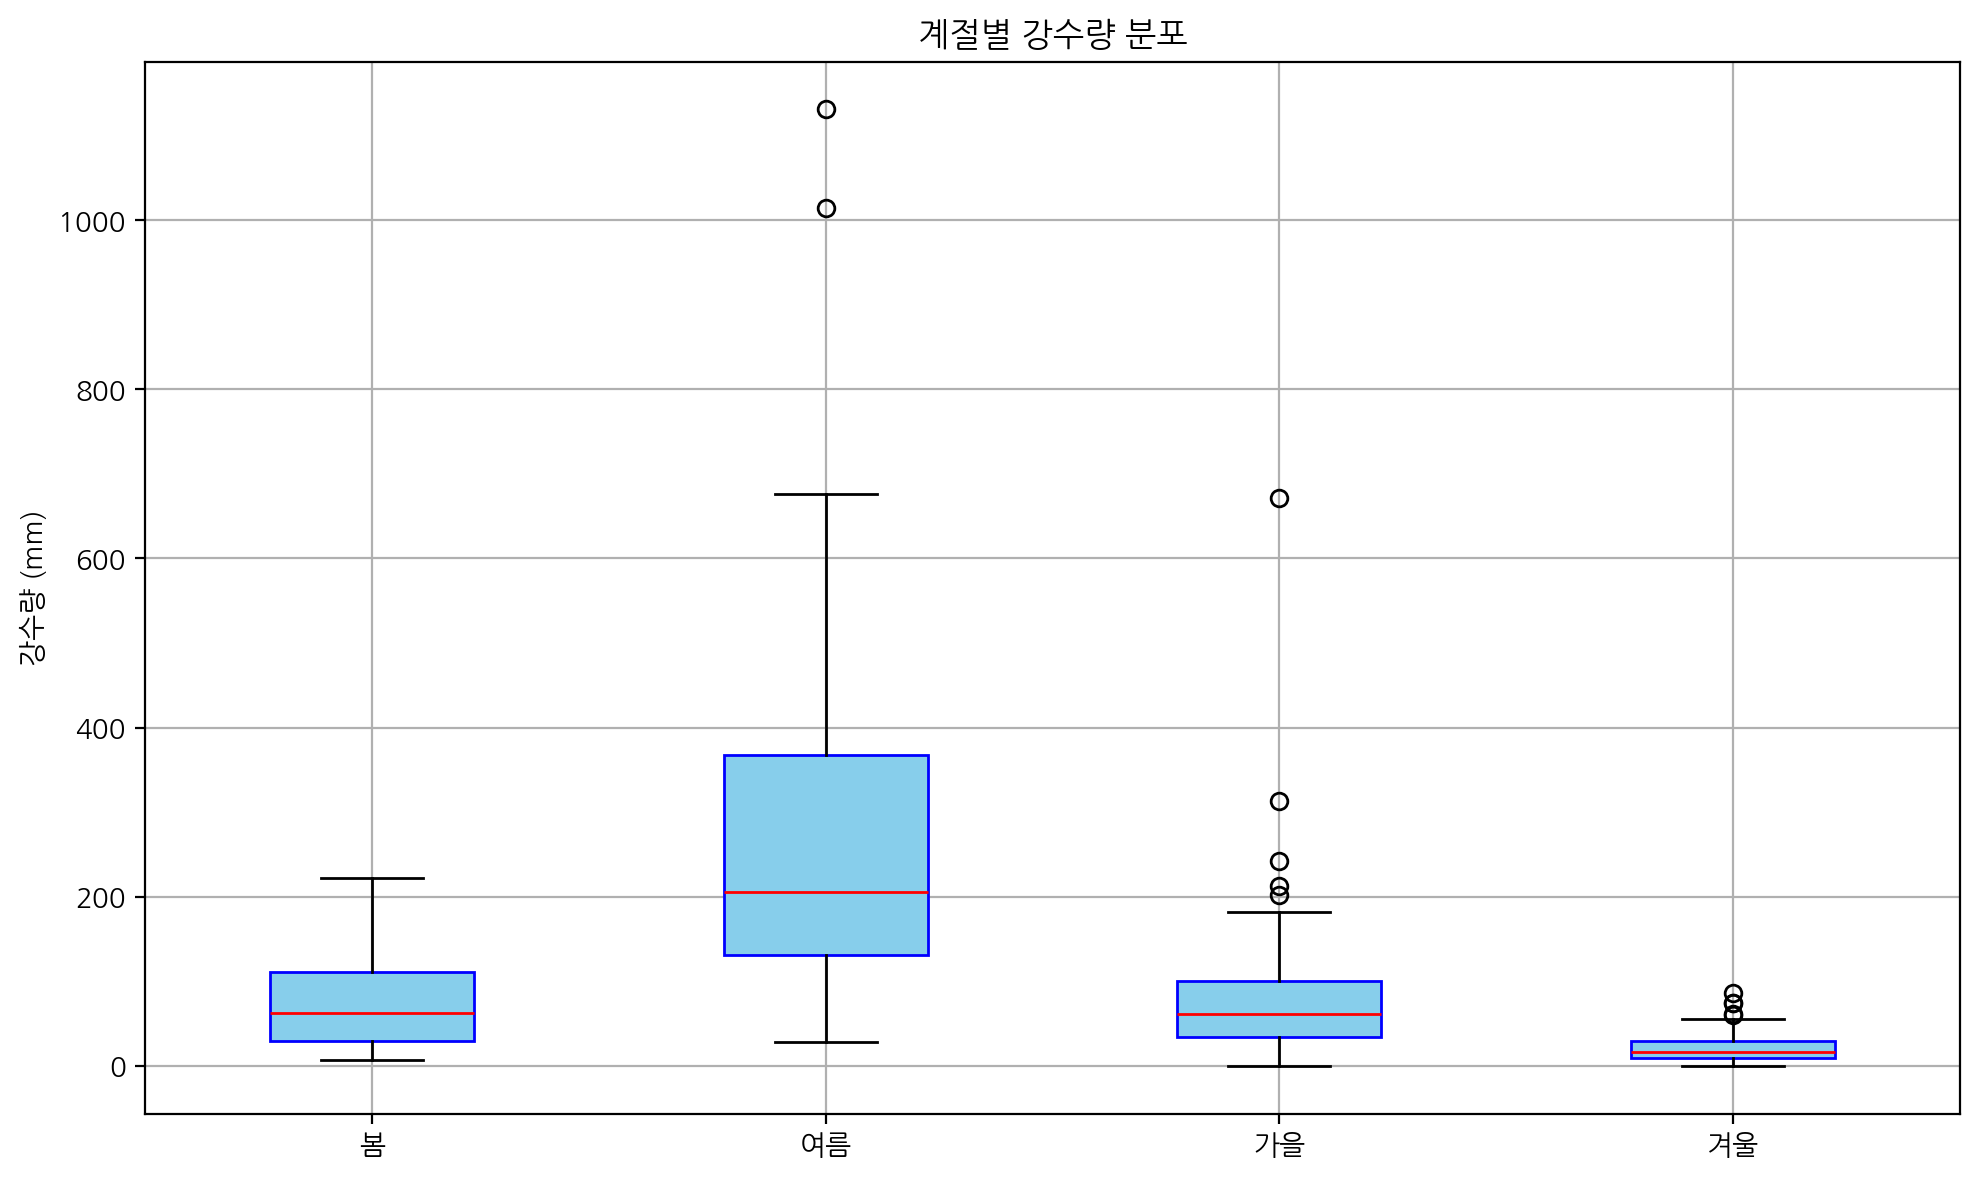

In [31]:
# 시각화: 계절별 강수량 분포 (boxplot)
plt.rc('font', family='NanumGothic')  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

plt.figure(figsize=(10,6))
plt.boxplot(
    [df[df['계절'] == s]['강수량(mm)'].dropna() for s in ['봄', '여름', '가을', '겨울']],
    labels=['봄', '여름', '가을', '겨울'],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red')
)
plt.title('계절별 강수량 분포')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 월별 강수량 평균 및 분포 분석

In [33]:
# 월별 평균 강수량 계산
monthly_avg = df.groupby('월')['강수량(mm)'].mean()

# 결과 출력
print("월별 평균 강수량 (mm):\n", monthly_avg)

월별 평균 강수량 (mm):
 월
1      17.138095
2      26.357143
3      42.357143
4      71.800000
5     101.457143
6     142.695000
7     437.215000
8     269.240000
9     148.020000
10     54.925000
11     57.130000
12     23.830000
Name: 강수량(mm), dtype: float64


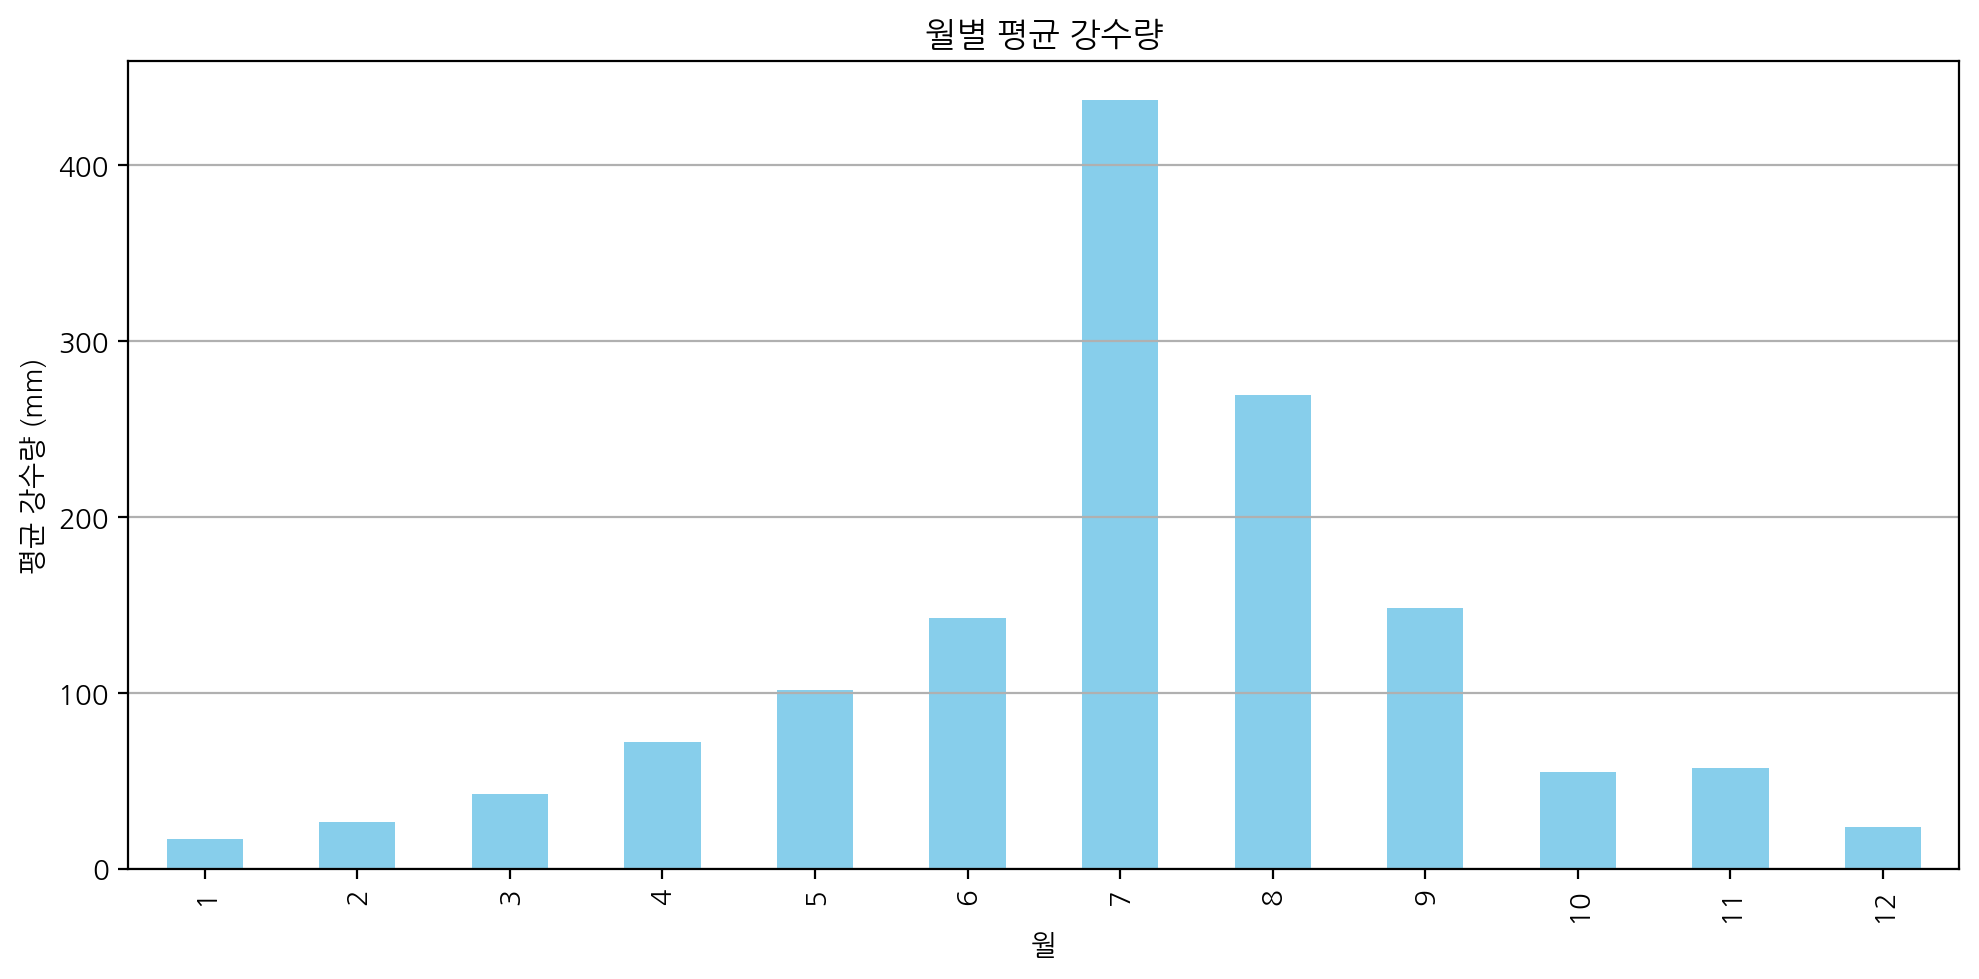

In [35]:
# 월별 강수량 분포 시각화 - 막대그래프
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('월별 평균 강수량')
plt.xlabel('월')
plt.ylabel('평균 강수량 (mm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<ipython-input-38-5b789f28d4e2>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


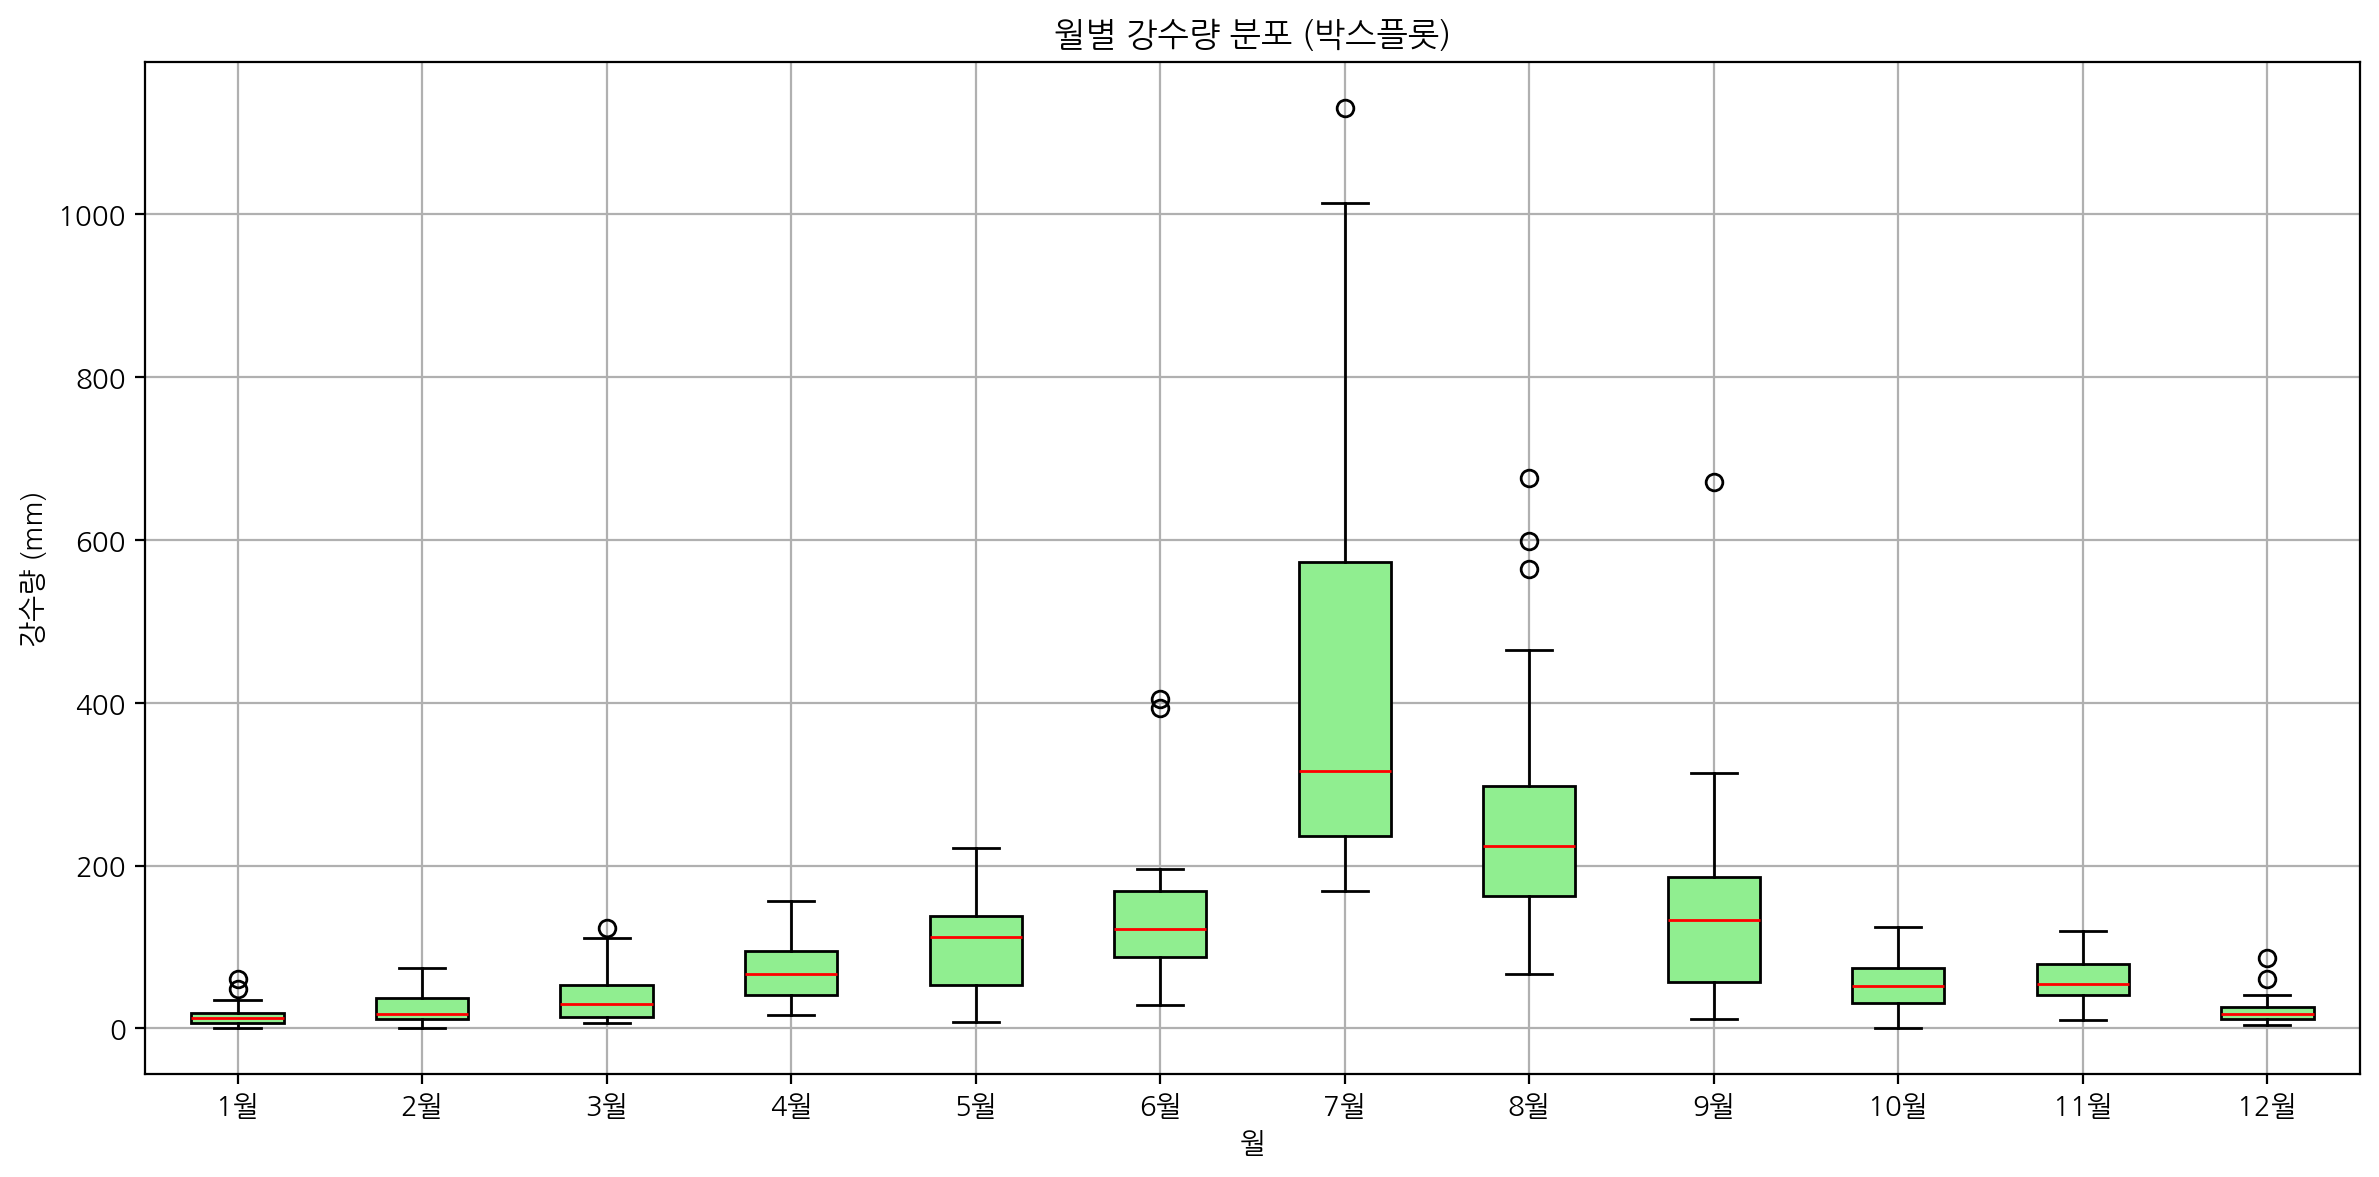

In [38]:
# 월별 강수량 분포 시각화 - 박스 플롯

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df[df['월'] == m]['강수량(mm)'].dropna() for m in range(1, 13)],
    labels=[str(m) + '월' for m in range(1, 13)],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen'),
    medianprops=dict(color='red')
)
plt.title('월별 강수량 분포 (박스플롯)')
plt.xlabel('월')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 폭우 발생 빈도 분석

In [41]:
#  폭우일 정의 및 필터링

threshold = 50 # 폭우 기준 정의 (예: 50mm 이상)

heavy_rain_df = df[df['강수량(mm)'] >= threshold].copy() # 폭우일 필터링

# 연도, 월 컬럼 추가
heavy_rain_df['연도'] = heavy_rain_df['일자'].dt.year
heavy_rain_df['월'] = heavy_rain_df['일자'].dt.month

In [44]:
# 연도별 폭우 발생일 수
annual_counts = heavy_rain_df['연도'].value_counts().sort_index()

# 월별 폭우 누적 발생일 수 (전체 연도 합산)
monthly_counts = heavy_rain_df['월'].value_counts().sort_index()

In [45]:
print("연도별 폭우 발생일 수 : ",annual_counts)

연도별 폭우 발생일 수 :  연도
2005    7
2006    5
2007    6
2008    6
2009    9
2010    8
2011    6
2012    7
2013    6
2014    6
2015    6
2016    7
2017    4
2018    8
2019    6
2020    8
2021    9
2022    7
2023    8
2024    8
2025    2
Name: count, dtype: int64


In [46]:
print("월별 폭우 누적 발생일 수 : ",monthly_counts)

월별 폭우 누적 발생일 수 :  월
1      1
2      4
3      6
4     14
5     16
6     19
7     20
8     20
9     15
10    11
11    11
12     2
Name: count, dtype: int64


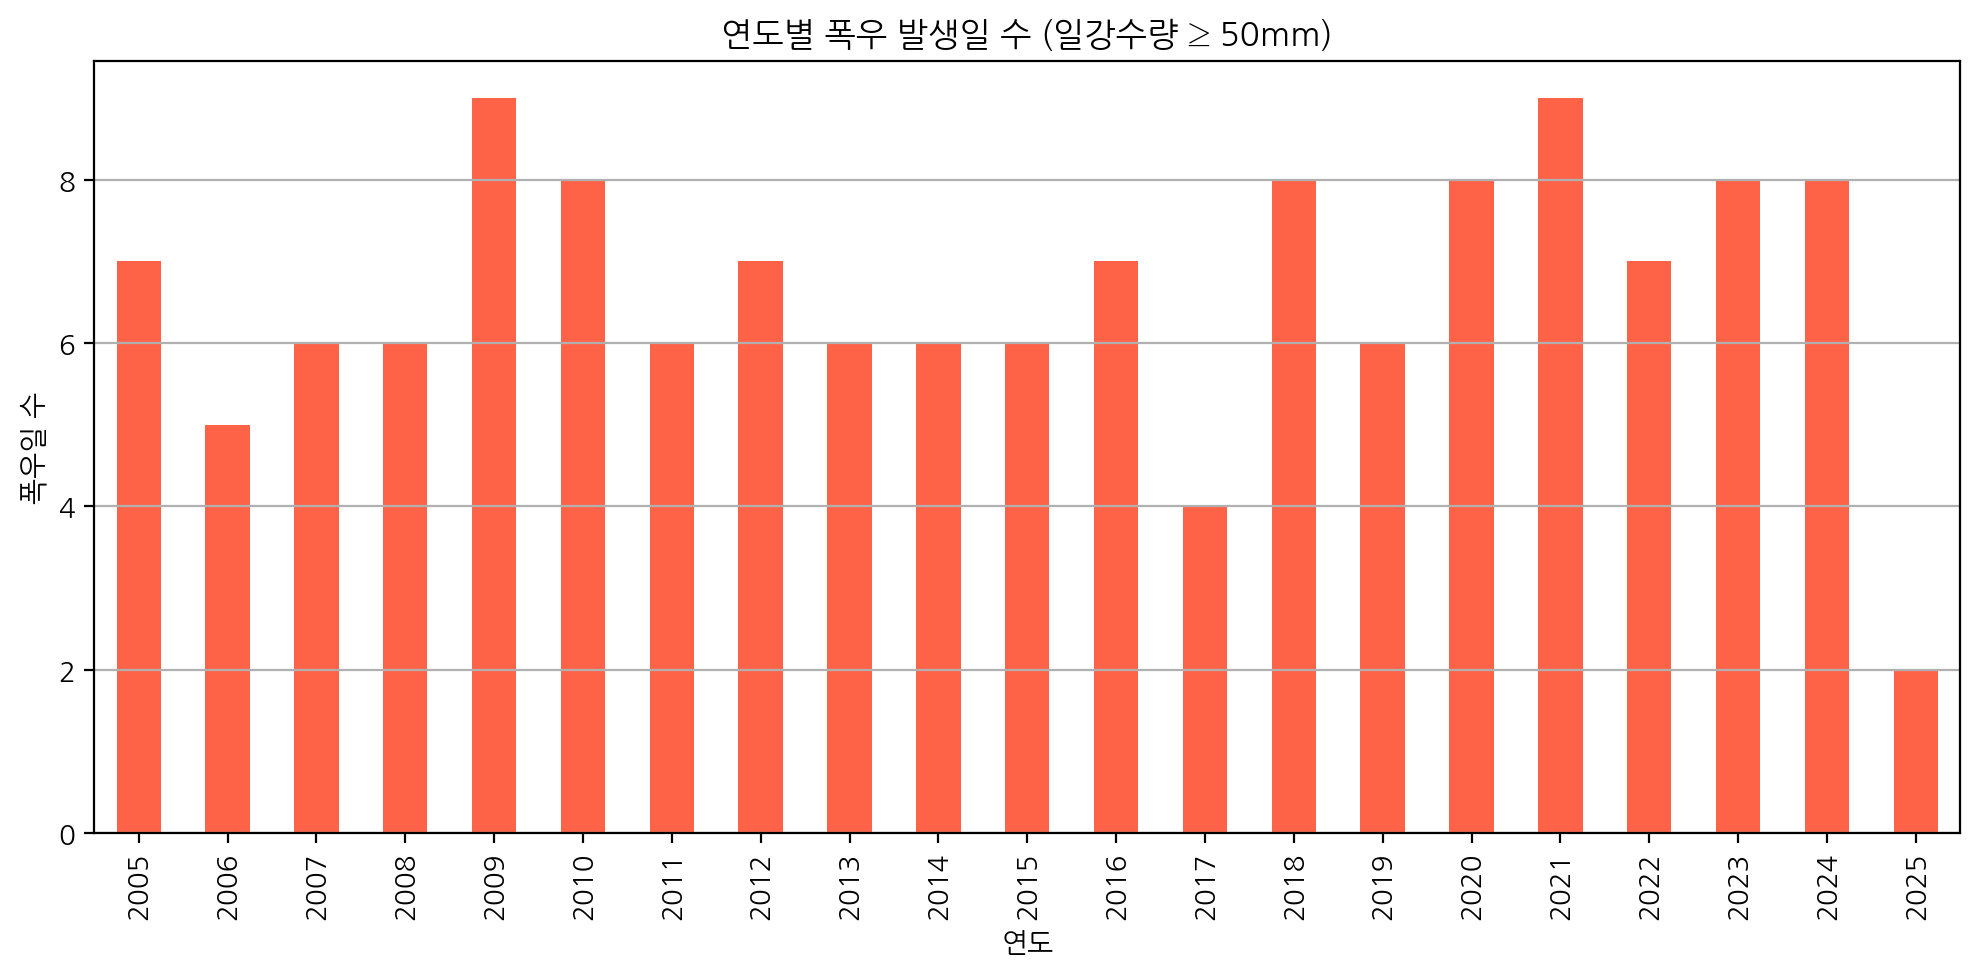

In [47]:
# 연도별 폭우 발생일 수
plt.figure(figsize=(10, 5))
annual_counts.plot(kind='bar', color='tomato')
plt.title(f'연도별 폭우 발생일 수 (일강수량 ≥ {threshold}mm)')
plt.xlabel('연도')
plt.ylabel('폭우일 수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

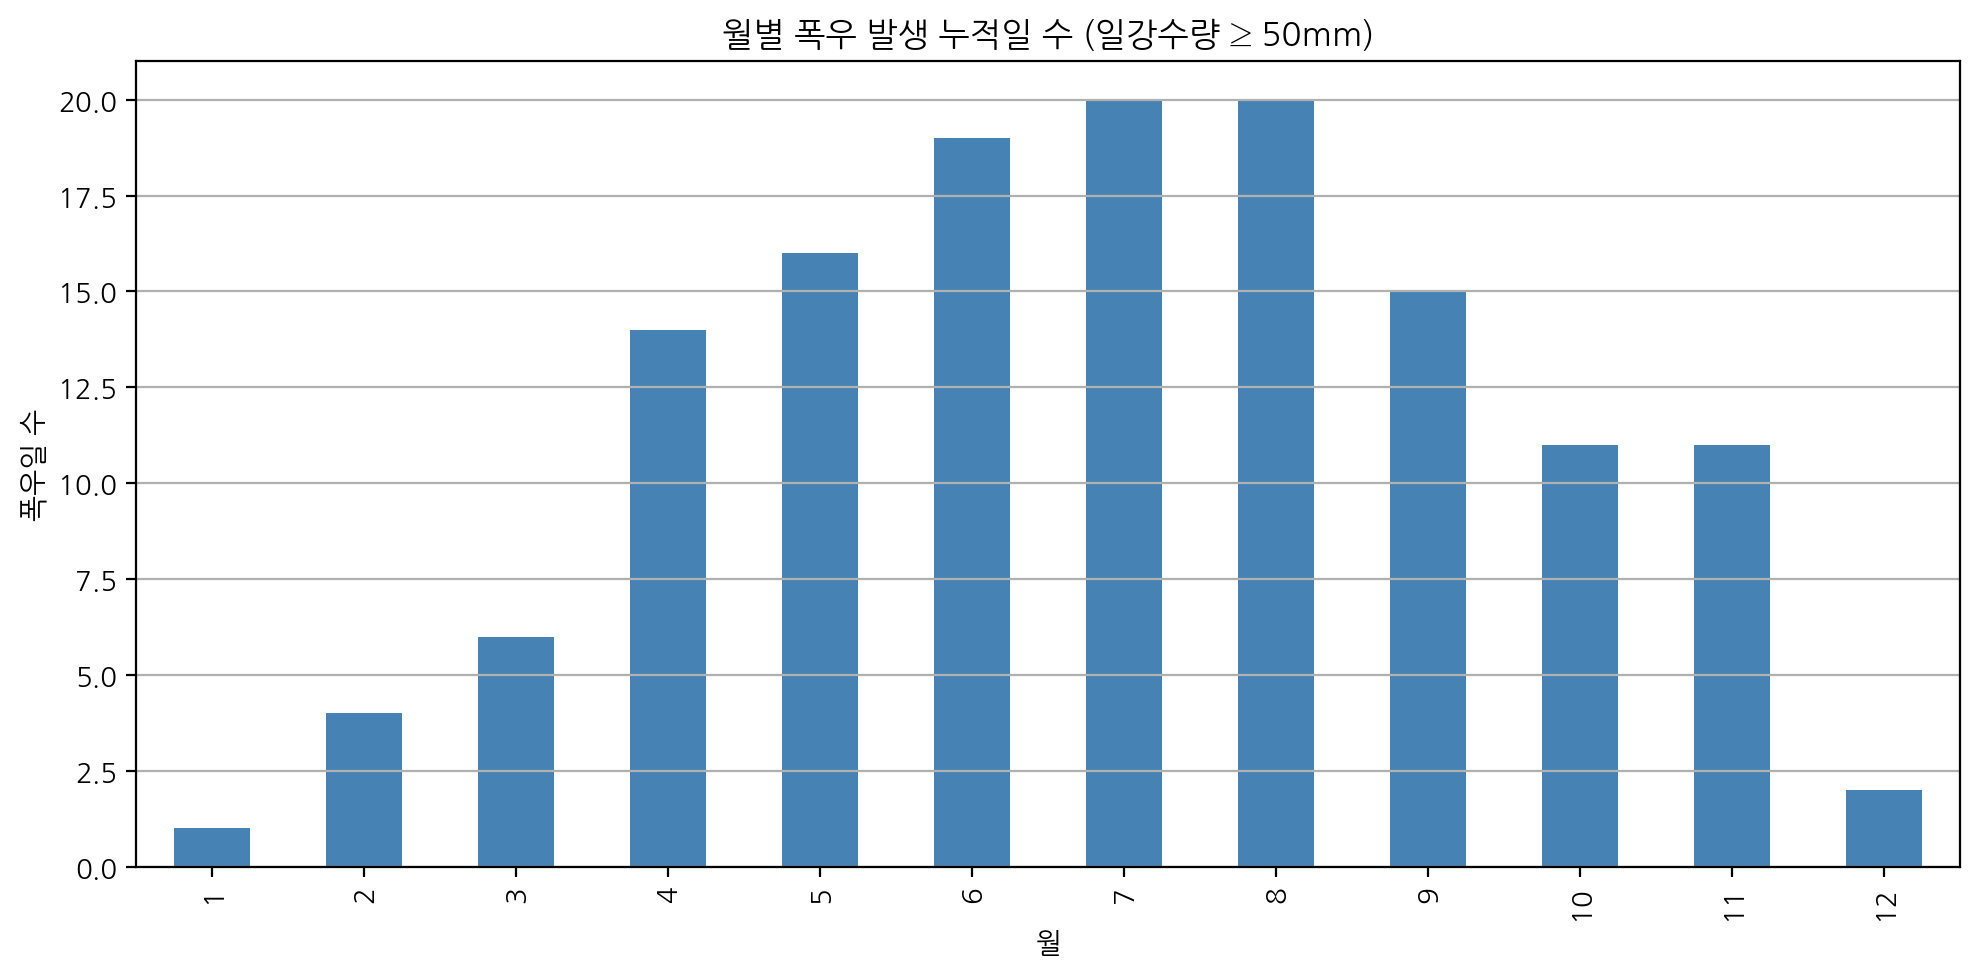

In [48]:
# 월별 폭우 발생 누적일 수
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='steelblue')
plt.title(f'월별 폭우 발생 누적일 수 (일강수량 ≥ {threshold}mm)')
plt.xlabel('월')
plt.ylabel('폭우일 수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 연간 강수일수 변화 분석

In [56]:
# 강수일 정의 및 연도별 집계
# 강수일 = 일강수량이 0.1mm 이상인 날의 수
# 특정 연도에 강수일수가 감소 → 가뭄 경향

# 강수량 수치로 변환
df['강수량(mm)'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')

# 강수일 기준: 0.1mm 이상
rainy_day_df = df[df['강수량(mm)'] >= 0.1].copy()

# 연도 컬럼 생성
rainy_day_df['연도'] = rainy_day_df['일자'].dt.year

# 연도별 강수일수 집계
annual_rainy_days = rainy_day_df['연도'].value_counts().sort_index()

In [57]:
print("연도별 강수일수 : ",annual_rainy_days)

연도별 강수일수 :  연도
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    11
2020    11
2021    12
2022    12
2023    12
2024    12
2025     5
Name: count, dtype: int64


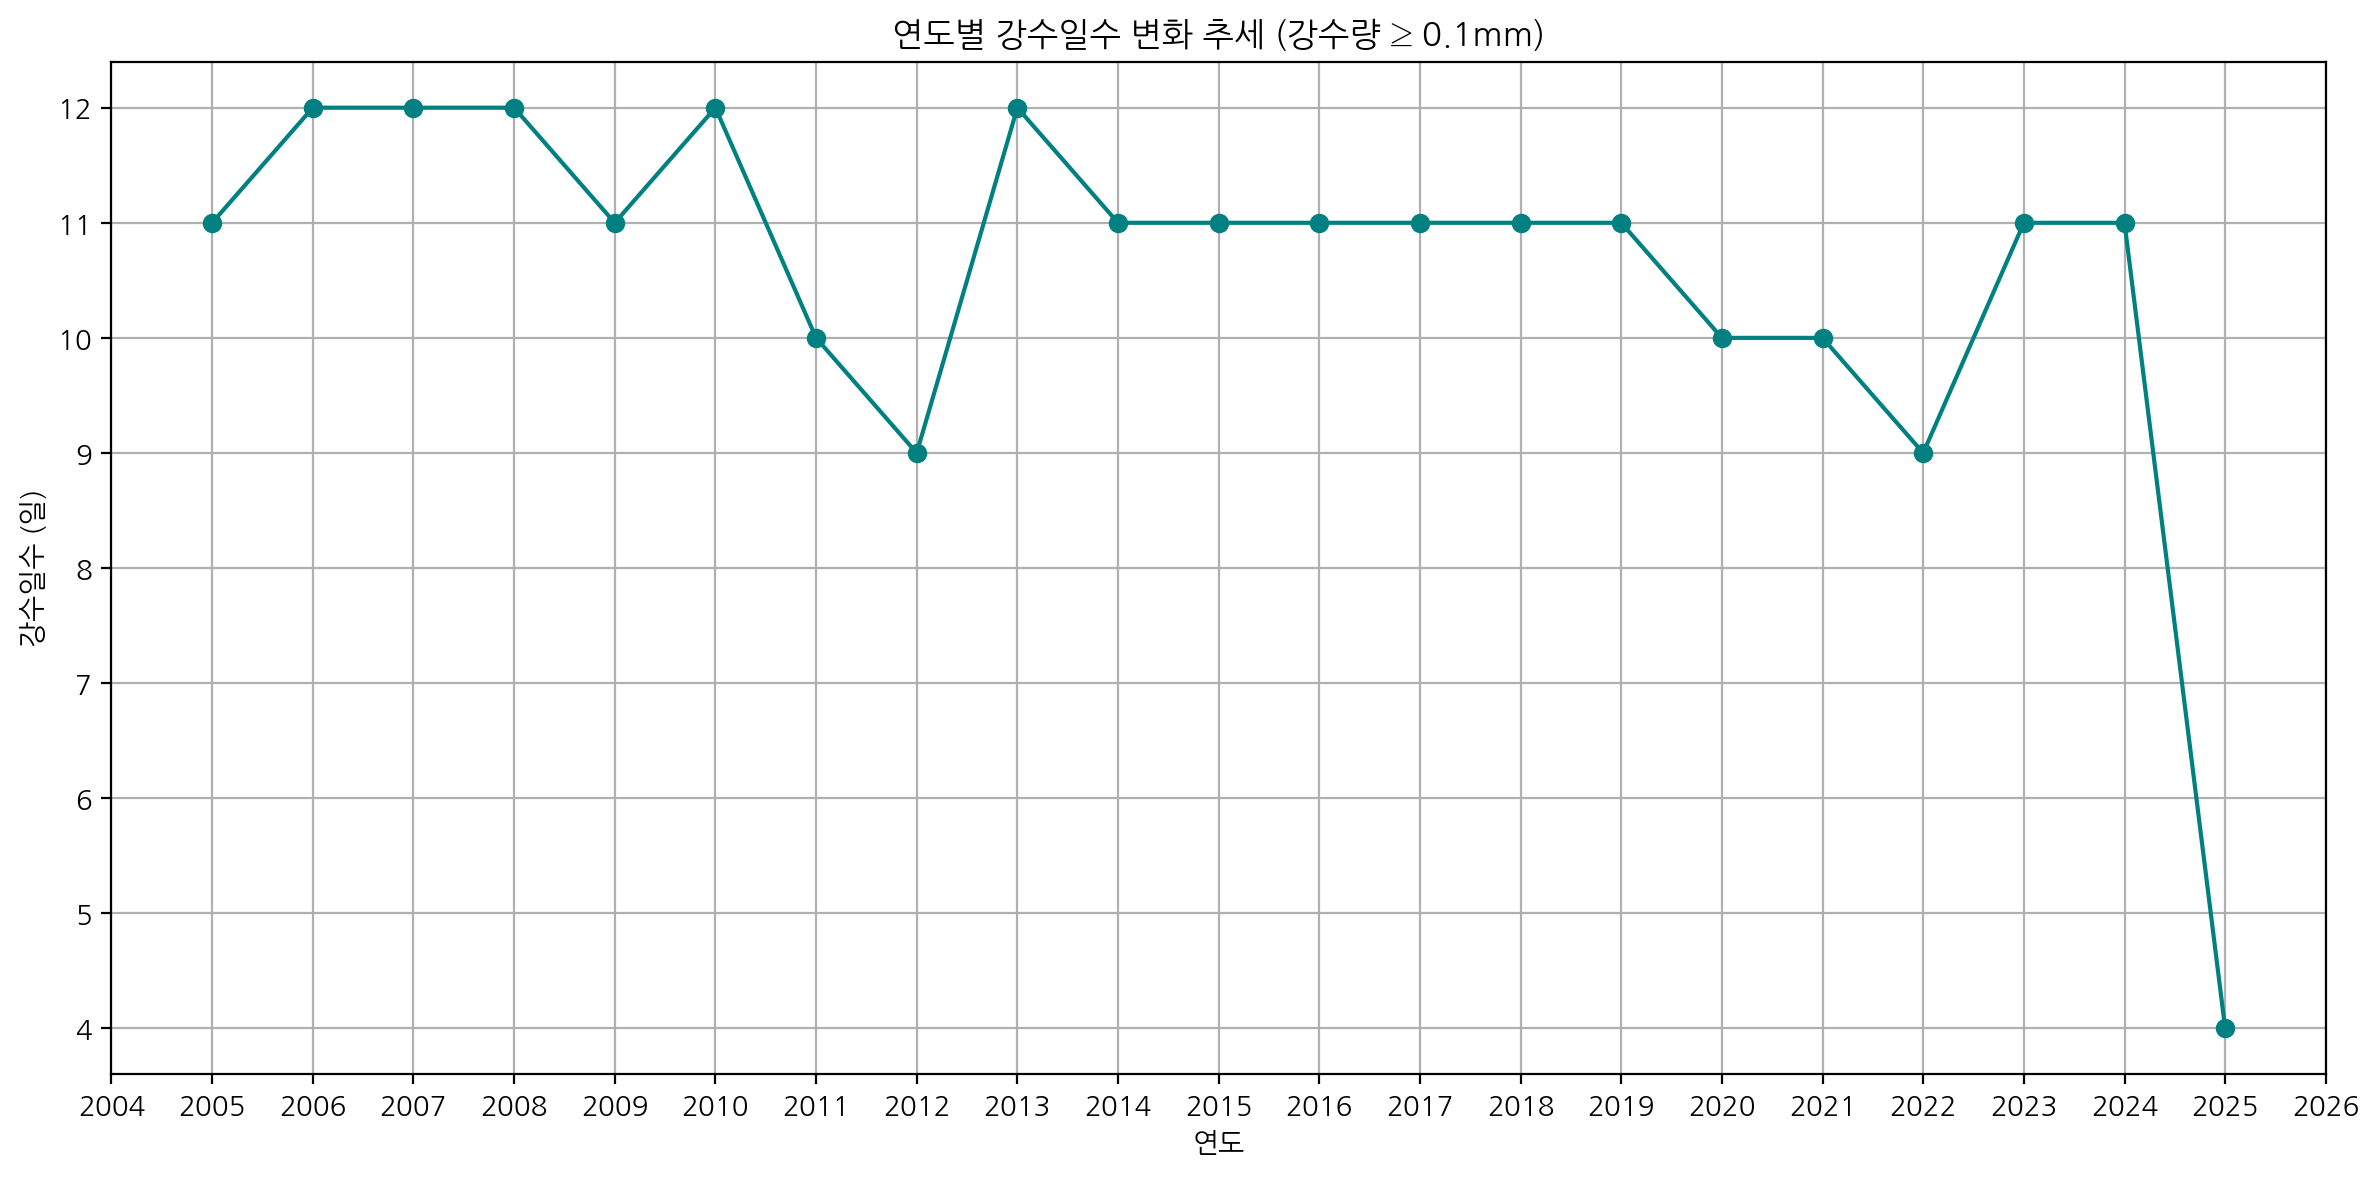

In [60]:
plt.figure(figsize=(12,6))
plt.plot(annual_rainy_days.index, annual_rainy_days.values,
         marker='o', linestyle='-', color='teal')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('연도별 강수일수 변화 추세 (강수량 ≥ 0.1mm)')
plt.xlabel('연도')
plt.ylabel('강수일수 (일)')
plt.grid(True)
plt.tight_layout()
plt.show()

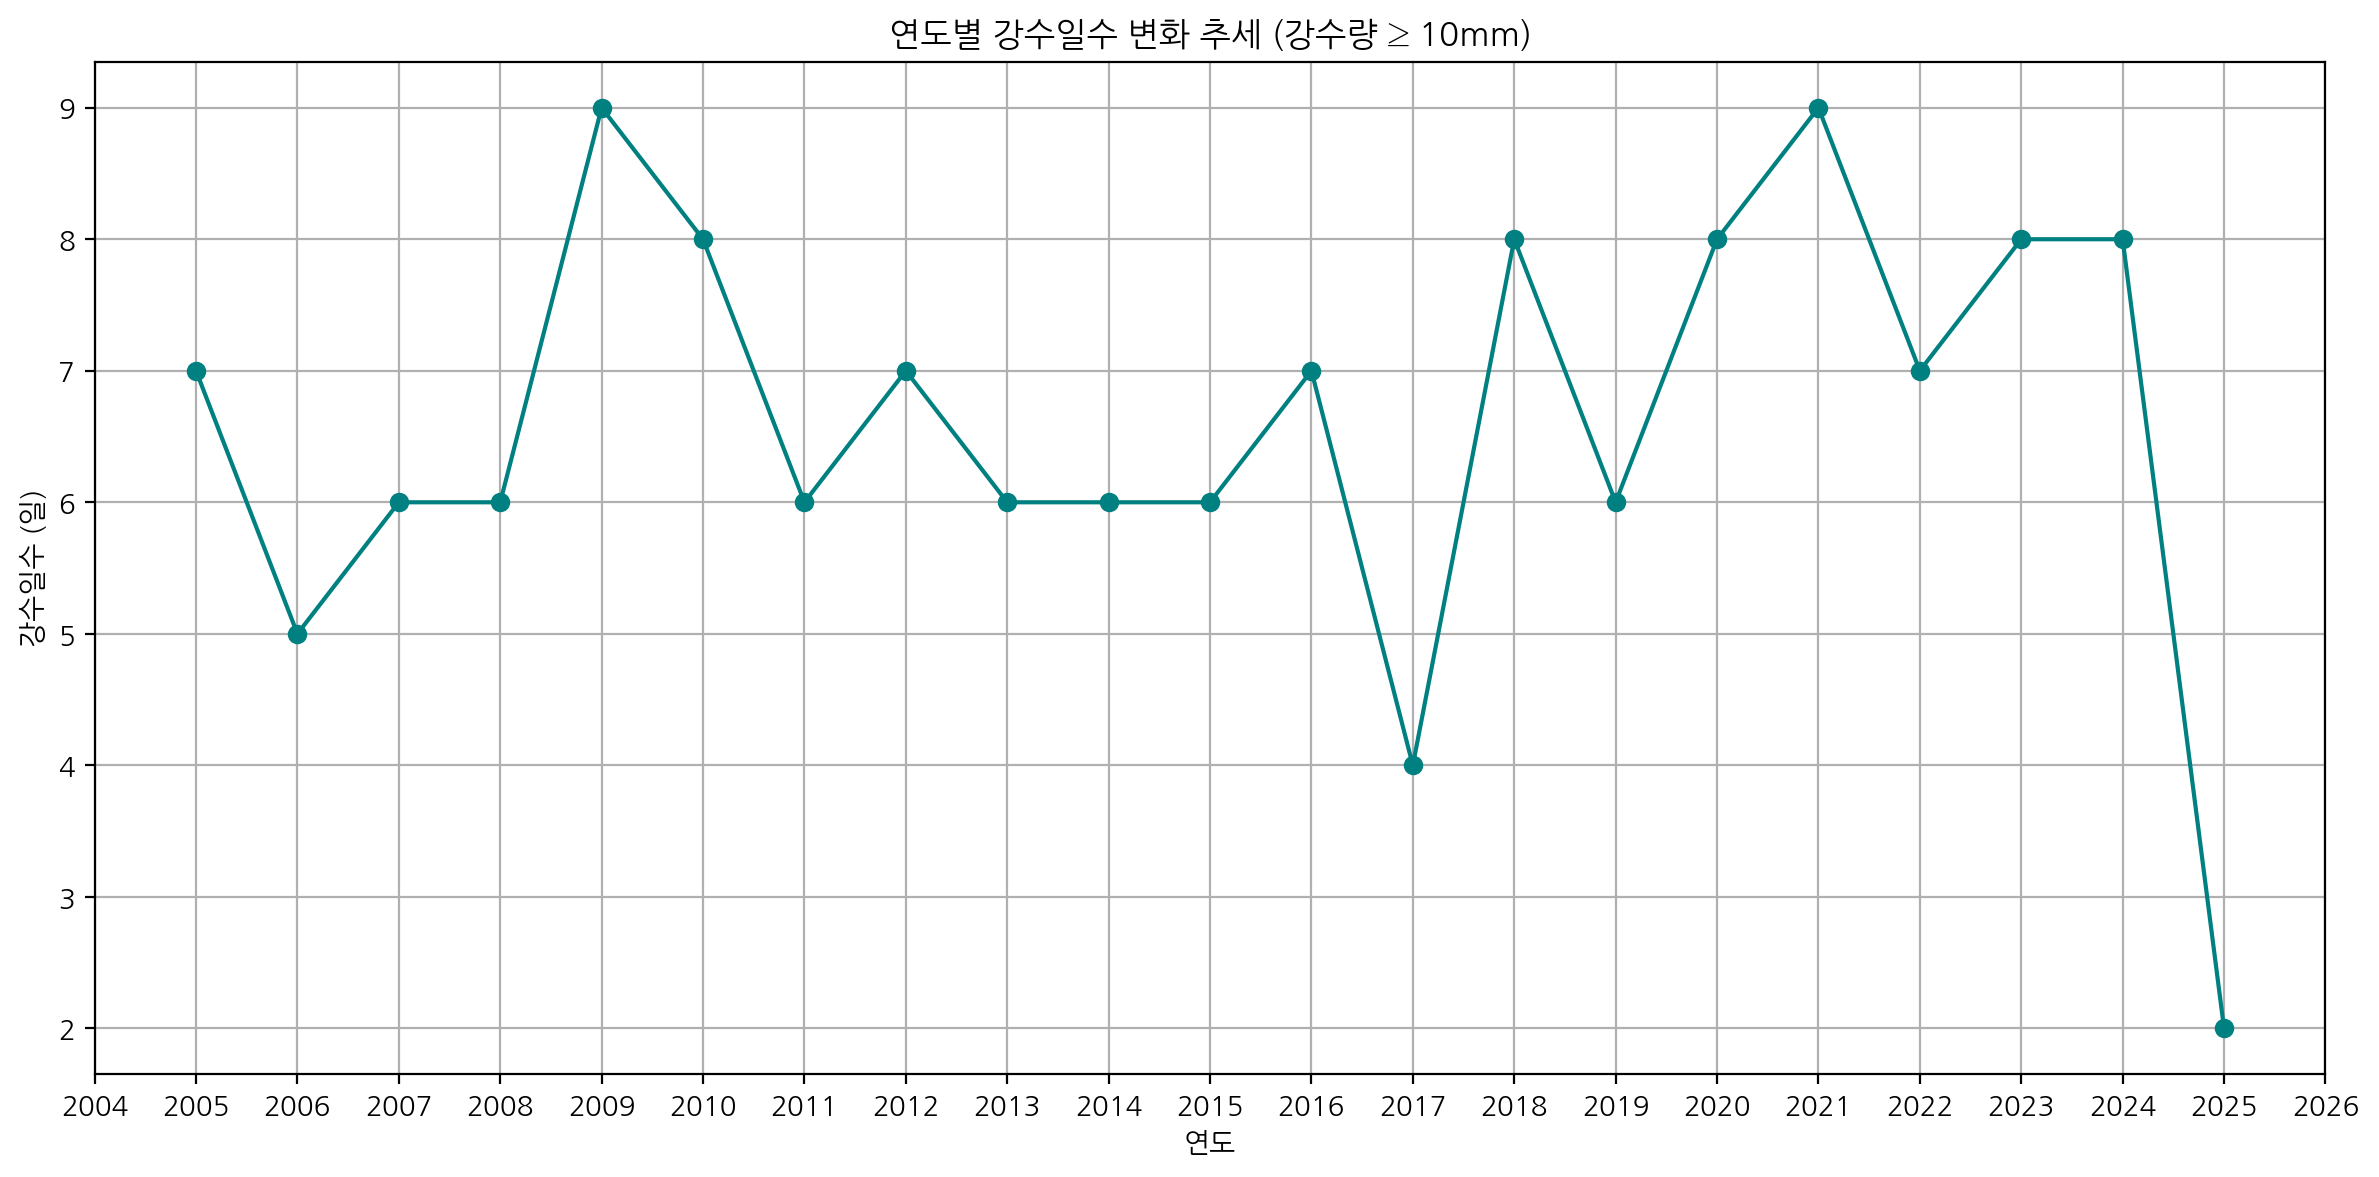

In [63]:
df['강수량(mm)'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')

# 강수일 기준: 50mm 이상
rainy_day_df = df[df['강수량(mm)'] >= 50].copy()

# 연도 컬럼 생성
rainy_day_df['연도'] = rainy_day_df['일자'].dt.year

# 연도별 강수일수 집계
annual_rainy_days = rainy_day_df['연도'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(annual_rainy_days.index, annual_rainy_days.values,
         marker='o', linestyle='-', color='teal')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('연도별 강수일수 변화 추세 (강수량 ≥ 50mm)')
plt.xlabel('연도')
plt.ylabel('강수일수 (일)')
plt.grid(True)
plt.tight_layout()
plt.show()